In [ ]:
# From https://nextjournal.com/gkoehler/pytorch-mnist

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
import numpy as np 

In [3]:
device = torch.device('mps')

transform = transforms.Compose([
        transforms.ToTensor()
    ])

train_dataset = torchvision.datasets.MNIST(
    '~/ML/data/', 
    train=True, 
    download=True,
    transform=transform,
)
train_dataset.data.to(device)
train_dataset.targets.to(device)


test_dataset = torchvision.datasets.MNIST(
    '~/ML/data/',
    train=False,
    download=True,
    transform=transform
)
test_dataset.data.to(device)
test_dataset.targets.to(device)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=64, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=1024, shuffle=True 
)

In [12]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)


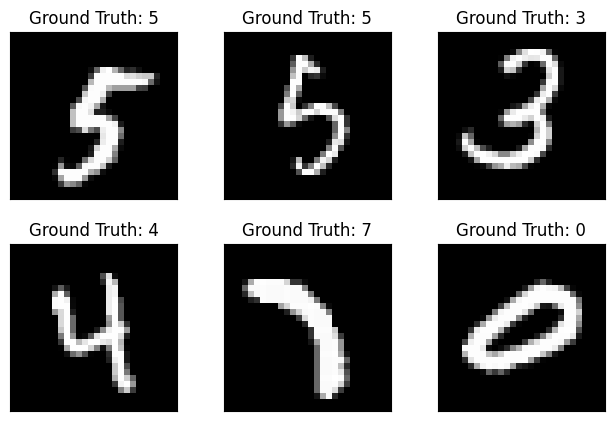

In [15]:
import matplotlib.pyplot as plt

def plotImages(n, data, targets, pred=None):
    fig = plt.figure()
    ncols = 3
    nrows = n//ncols
    for i in range(n):
      plt.subplot(nrows, ncols,i+1)
      plt.tight_layout()
      plt.imshow(data[i][0], cmap='gray', interpolation='none')
      if pred != None:
        plt.title("Ground Truth: {}| Pred:{}".format(targets[i], pred[i]))
      else:
        plt.title("Ground Truth: {}".format(targets[i]))
      plt.xticks([])
      plt.yticks([])
      fig
    
plotImages(6, example_data, example_targets)

In [9]:
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        input_dim = 28
        kernel_size = 5
        last_conv_out = (input_dim - kernel_size + 1)/2 
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten(),
            nn.Linear(in_features=int(pow(last_conv_out,2)*10), out_features=50, bias=True),
            nn.Linear(in_features=50, out_features=10, bias=True)
        )
        
    def forward(self, x):
        x = self.net(x)
        return F.log_softmax(x, dim =1)
    
network = MNISTNet().to(device)
learning_rate = 0.01
momentum = 0.5
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

In [18]:
train_log_batch = 100
def train(epoch):
    network.train() # Required for dropout
    total_loss = 0
    count = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        target = target.to(device)
        optimizer.zero_grad()
        output = network(data.to(device))
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        count+=target.shape[0]

        if (batch_idx+1) % train_log_batch == 0:
            print("\tTrain Batch: {} Loss: {:.6f}".format(batch_idx+1, total_loss/count))
            
    print('Train Epoch: {} Loss: {:.6f}\n'.format(epoch, total_loss/count))


In [5]:
def test():
    network.eval() 
    total_loss = 0
    total_correct = 0
    count = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        target=target.to(device)
        output = network(data.to(device))
        loss = F.nll_loss(output, target)
        total_loss += loss.item()
        
        pred = output.data.max(1).indices
        total_correct += (pred == target).sum()
        
        
        count+=target.shape[0]
    print('Test Accuracy: {:.4f}, Loss: {:.6f}\n'.format(total_correct/count*100, total_loss/count))

In [10]:
import timeit
timeit.timeit(lambda: test(), number=1 )

Test Accuracy: 11.4917, Loss: 0.002262



1.676389249998465

In [19]:
n_epoch=5
test()
for epoch in range(1, n_epoch+1):
    train(epoch)
    test()

Test Accuracy: 11.4917, Loss: 0.002262



	Train Batch: 100 Loss: 0.028653


	Train Batch: 200 Loss: 0.020013


	Train Batch: 300 Loss: 0.015746


	Train Batch: 400 Loss: 0.013379


	Train Batch: 500 Loss: 0.011811


	Train Batch: 600 Loss: 0.010775


	Train Batch: 700 Loss: 0.010007


	Train Batch: 800 Loss: 0.009374


	Train Batch: 900 Loss: 0.008913


Train Epoch: 1 Loss: 0.008757



Test Accuracy: 91.0500, Loss: 0.000302



	Train Batch: 100 Loss: 0.004909


	Train Batch: 200 Loss: 0.004932


	Train Batch: 300 Loss: 0.004865


	Train Batch: 400 Loss: 0.004834


	Train Batch: 500 Loss: 0.004728


	Train Batch: 600 Loss: 0.004645


	Train Batch: 700 Loss: 0.004587


	Train Batch: 800 Loss: 0.004539


	Train Batch: 900 Loss: 0.004483
Train Epoch: 2 Loss: 0.004485



Test Accuracy: 92.4783, Loss: 0.000259



	Train Batch: 100 Loss: 0.004063


	Train Batch: 200 Loss: 0.004067


	Train Batch: 300 Loss: 0.004055


	Train Batch: 400 Loss: 0.004025


	Train Batch: 500 Loss: 0.003982


	Train Batch: 600 Loss: 0.003906


	Train Batch: 700 Loss: 0.003882


	Train Batch: 800 Loss: 0.003828


	Train Batch: 900 Loss: 0.003801
Train Epoch: 3 Loss: 0.003789



Test Accuracy: 93.7200, Loss: 0.000215



	Train Batch: 100 Loss: 0.003322


	Train Batch: 200 Loss: 0.003244


	Train Batch: 300 Loss: 0.003253


	Train Batch: 400 Loss: 0.003197


	Train Batch: 500 Loss: 0.003197


	Train Batch: 600 Loss: 0.003205


	Train Batch: 700 Loss: 0.003179


	Train Batch: 800 Loss: 0.003174


	Train Batch: 900 Loss: 0.003139


Train Epoch: 4 Loss: 0.003141



Test Accuracy: 94.9967, Loss: 0.000174



	Train Batch: 100 Loss: 0.002911


	Train Batch: 200 Loss: 0.002935


	Train Batch: 300 Loss: 0.002852


	Train Batch: 400 Loss: 0.002797


	Train Batch: 500 Loss: 0.002738


	Train Batch: 600 Loss: 0.002719


	Train Batch: 700 Loss: 0.002692


	Train Batch: 800 Loss: 0.002676


	Train Batch: 900 Loss: 0.002632


Train Epoch: 5 Loss: 0.002625



Test Accuracy: 95.8167, Loss: 0.000146



In [20]:
pred = network(example_data.to(device)).max(1).indices

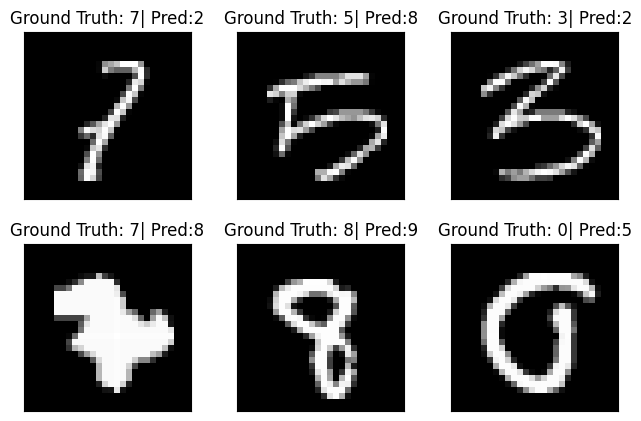

In [21]:
idxs = pred != example_targets.to(device)
plotImages(6, example_data.to(device)[idxs].to('cpu'), example_targets.to(device)[idxs].to('cpu'), pred[idxs].to('cpu'))